In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data3 = pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\bigdatamart_Train.csv")

In [23]:
data1 = pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\bigdatamart_Test.csv")

In [24]:
data3.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
data1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [26]:
data3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
corr_matrix=data3.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [28]:
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('LF','Low Fat')
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('reg','Regular')
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('low fat','Low Fat')

In [29]:
#WE REPLACE NULL VALUES IN Item_Weight WITH MEAN AND Outlet_Size WITH MEDDIUM

data3['Item_Weight'].fillna(data3['Item_Weight'].mean(), inplace=True)

In [30]:
data3['Outlet_Size']=data3['Outlet_Size'].replace(np.nan,'Medium' )

In [31]:
data3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

AttributeError: module 'seaborn' has no attribute 'scatterplot'

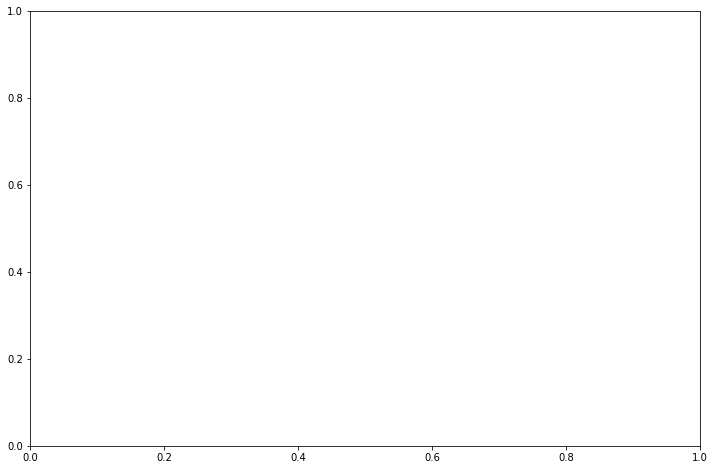

In [33]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=data3)

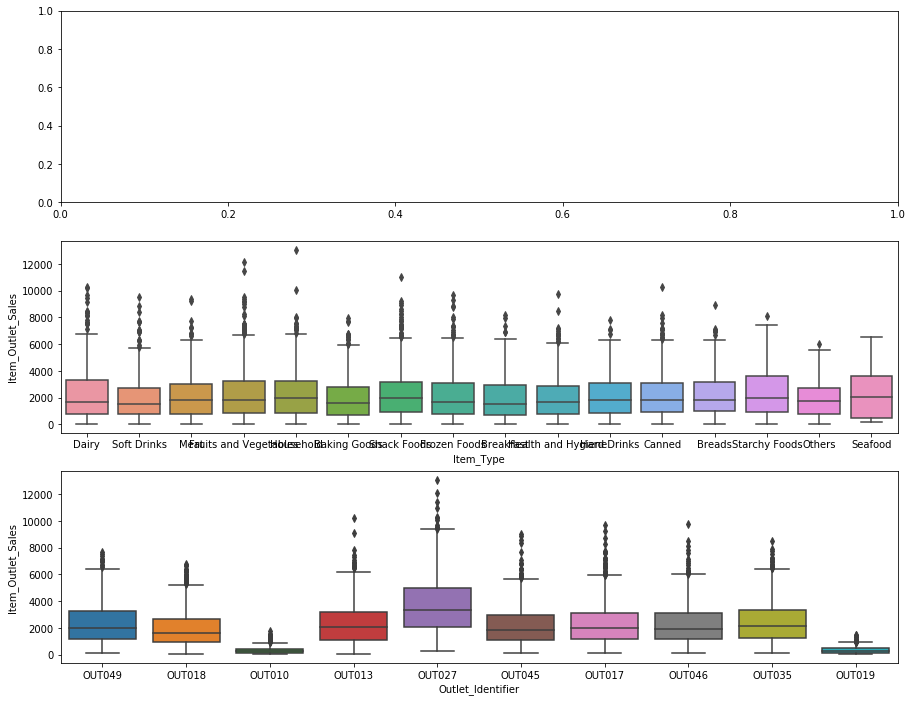

In [36]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=data3)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=data3)

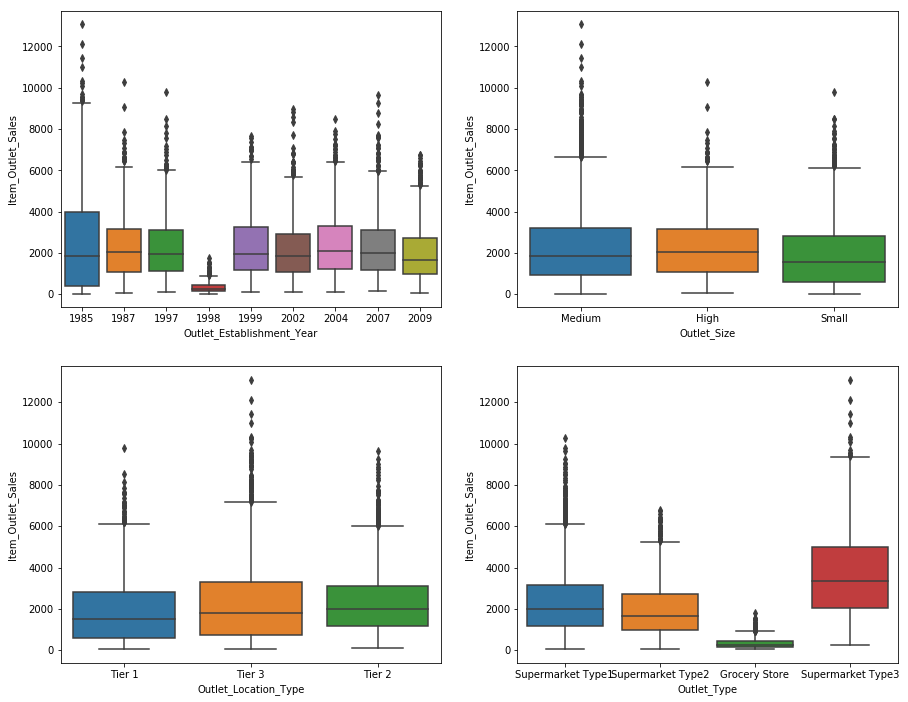

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=data3)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=data3)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=data3)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=data3)

In [38]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
le1=  LabelEncoder()
data3['Item_Fat_Content']= le.fit_transform(data3['Item_Fat_Content']) 
data3['Item_Type']=le.fit_transform(data3['Item_Type'])
data3['Outlet_Identifier']=le.fit_transform(data3['Outlet_Identifier'])
data3['Outlet_Location_Type']=le.fit_transform(data3['Outlet_Location_Type'])
data3['Outlet_Type']=le.fit_transform(data3['Outlet_Type'])
data3['Item_Identifier']= le.fit_transform(data3['Item_Identifier']) 
data3['Outlet_Size']= le1.fit_transform(data3['Outlet_Size']) 

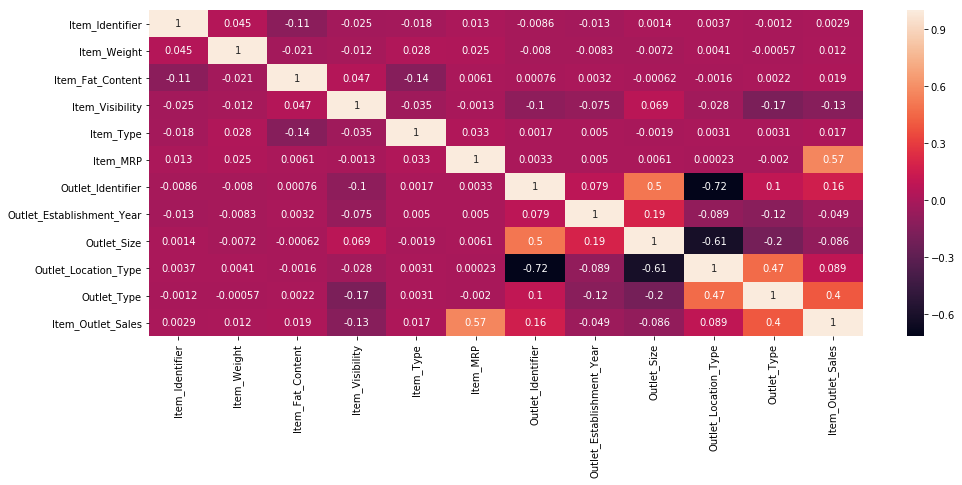

In [39]:
plt.figure(figsize=(16,6))
sns.heatmap(data3.corr(), annot=True)

In [40]:
y=data3['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    36

In [41]:
x=data3.drop(columns=['Item_Outlet_Sales'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1


In [43]:
# IMPACT OF Item_Fat_Content ON OUTLET SALES

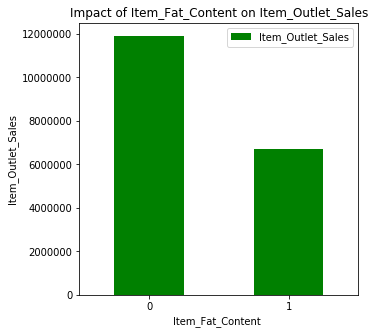

In [42]:
Outlet_Type_pivot = data3.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Outlet_Type_pivot.plot(kind='bar', color='GREEN',figsize=(5,5))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

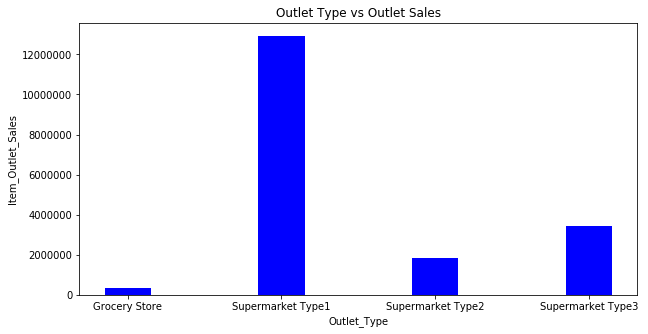

In [44]:
plt.figure(figsize=(10,5))
type2=data3.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
store_types=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
plt.bar(store_types,type2, width=0.3,color='BLUE')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

In [ ]:
#IMPACT OF OUTLET SIZE ON OUTLET SALES

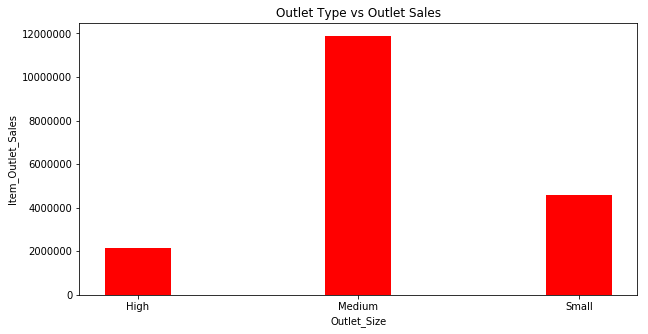

In [45]:
plt.figure(figsize=(10,5))
type3 = data3.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
size = ['High', 'Medium', 'Small']
plt.bar(size, type3, color='RED',width=0.3)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

In [ ]:
#SPLITTING OF TRAIN AND TEST DATA WITH TEST SIZE OF 25%

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.25)

In [47]:
X_train.shape , X_test.shape

((6392, 11), (2131, 11))

In [ ]:
#Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(X_test)
mse=mean_squared_error(Y_test,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1192.186309993872

In [50]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train,Y_train)
predict_r=r.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
r_score=np.sqrt(mse)
r_score

1192.1893230260628

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
predict_r=dtr.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1573.2269547712474

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predict_r=rf.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
rf_score=np.sqrt(mse)
rf_score


1162.5067239934756

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
p=gbr.predict(X_test)
gb_score=mean_squared_error(Y_test,p)
gb_score=np.sqrt(gb_score)
gb_score

1072.8170130425406

In [54]:
name=['Linear Regression','Ridge Regression',
     'Decision Tree Regression','Random Forest',
     'Gradient Boost']

In [55]:
go=pd.DataFrame({'RMSE':[lr_score,r_score,dtr_score,rf_score,gb_score]},index=name)


In [56]:
go.RMSE.sort_values()

Gradient Boost              1072.817013
Random Forest               1162.506724
Linear Regression           1192.186310
Ridge Regression            1192.189323
Decision Tree Regression    1573.226955
Name: RMSE, dtype: float64

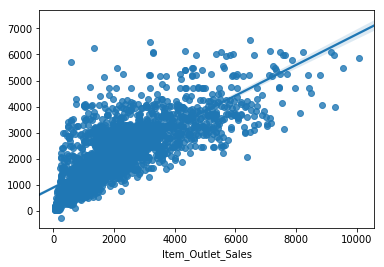

In [57]:
sns.regplot(Y_test, p)

In [58]:
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('LF','Low Fat')
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('reg','Regular')
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('low fat','Low Fat')
data1['Item_Weight'].fillna(data1['Item_Weight'].mean(), inplace=True)
data1['Outlet_Size']=data1['Outlet_Size'].replace(np.nan,'Medium' )
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [59]:
data1['Item_Fat_Content']= le.fit_transform(data1['Item_Fat_Content']) 
data1['Item_Type']=le.fit_transform(data1['Item_Type'])
data1['Outlet_Identifier']=le.fit_transform(data1['Outlet_Identifier'])
data1['Outlet_Location_Type']=le.fit_transform(data1['Outlet_Location_Type'])
data1['Outlet_Type']=le.fit_transform(data1['Outlet_Type'])
data1['Item_Identifier']= le.fit_transform(data1['Item_Identifier']) 
data1['Outlet_Size']= le1.fit_transform(data1['Outlet_Size'])

In [60]:
predict=gbr.predict(data1)
predict

array([1604.84601434, 1402.87394368,  580.45933717, ..., 1902.55912116,
       3700.82200179, 1283.7881376 ])